# Neural Nets 2
Ben Jafek  
MATH 404  
2/26/18

In [1]:
import time
import numpy as np
from matplotlib import pyplot as plt 
import os

from keras.datasets import fashion_mnist as fmn
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

/usr/local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Problem 1
Experiment with fully connected neural nets for classification of the Fashion-MNIST data: add at least two more layers, make all hidden layers at least 20 neurons wide, and try it with both ReLU and sigmoid activations.  Train for as many epochs as you need until the loss function (categorical cross entropy) stops improving--Keras's `callbacks.EarlyStopping` may be useful.

In [2]:
(x_train, y_train), (x_test, y_test) = fmn.load_data()
#Flatten the inputs to L*784 instead of L*28*28
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

# Convert labels to categorical one-hot encoding
one_hot_train_labels = to_categorical(y_train, num_classes=10)
one_hot_test_labels = to_categorical(y_test, num_classes=10)

4423680/4422102 [==============================] - 8s 2us/step


In [ ]:
ACCS = []
TIMES = []
num_epochs = 30
ovr_start = time.time()

for act in ['relu', 'sigmoid']:
    print (act)
    
    model = Sequential()
    model.add(Dense(64, input_dim=784))
    model.add(Activation(act))

    model.add(Dense(32, input_dim=64))
    model.add(Activation(act))

    model.add(Dense(32, input_dim=32))
    model.add(Activation(act))

    model.add(Dense(16, input_dim=32))
    model.add(Activation(act))

    model.add(Dense(10, input_dim=16))
    model.add(Activation('softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model, iterating on the data in batches of 32 samples
    start = time.time()
    hist = model.fit(x_train, one_hot_train_labels, epochs=num_epochs, batch_size=32, verbose=0)
    elapsed = time.time() - start
    
    #Now save it for future indulgence.
    acc_arr = np.array(hist.history['acc']) 
    loss_arr = np.array(hist.history['loss'])
    time_arr = np.array(elapsed)
    np.save('NN2/{}_accs.npy'.format(act), acc_arr)
    np.save('NN2/{}_time.npy'.format(act), time_arr)
    np.save('NN2/{}_loss.npy'.format(act), loss_arr)
    
print ('TOTAL TIME ELAPSED: {:.3f}'.format(time.time() - ovr_start))


In [7]:
#I did it this way because I left the computer running for a long time,
# and wanted to make sure that I didn't lose the variables.
relu_acc = np.load('NN2/relu_accs.npy')
relu_loss = np.load('NN2/relu_loss.npy')
sig_acc = np.load('NN2/sigmoid_accs.npy')
sig_loss = np.load('NN2/sigmoid_loss.npy')

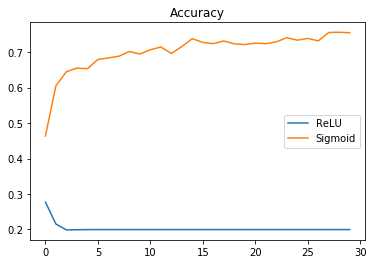

In [9]:
plt.plot(relu_acc, label='ReLU')
plt.plot(sig_acc, label='Sigmoid')
plt.legend()
plt.title('Accuracy')
plt.show()

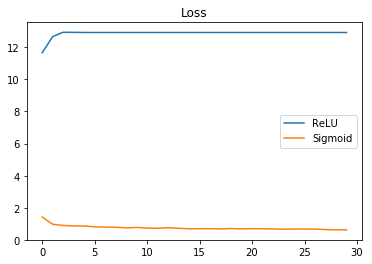

In [12]:
plt.plot(relu_loss, label='ReLU')
plt.plot(sig_loss, label='Sigmoid')
plt.legend()
plt.title('Loss')
plt.show()

### Analysis
As we can see, the sigmoid activation functions work much better than the ReLU functions. I think this is because the network is so shallow, the sigmoid function allows for more precision of numbers than the ReLU would, which gains its advantage on huge networks.

# Problem 2
(On written homework)